# Learn the basics about notebooks and Apache Spark

This notebook introduces you to the basics of analytics notebooks and explains what Apache Spark is and how to use Spark in notebooks. The notebook shows you how to load data into the notebook, parse and explore the data, run queries on the data to extract information, plot your analysis results, and save your result in Object Storage.

This notebook runs on Python 3.8 with Spark 3, and Cloud Object Storage.

## Table of contents
- [What is Apache Spark](#apache_spark)
- [Employee Attrition Data](#Employee_Attrition_Data)
- [Load data](#load_data)
- [Working with RDD](#RDD)
- [Work with DataFrame](#DataFrame)
- [Use Spark SQL](#use_spark_sql)

<a id="apache_spark"></a>
## What is Apache Spark

[Spark](http://spark.apache.org/) is a fast open-source engine for large-scale data processing. It is built for speed and ease of use. Through the advanced DAG execution engine that supports cyclic data flow and in-memory computing, programs can run up to 100 times faster than Hadoop MapReduce in memory, or 10 times faster on disc.

Spark consists of the following components:

* Spark Core is the underlying computation engine with the fundamental programming abstraction called resilient distributed datasets (RDDs)
* Spark SQL provides a new data abstraction called DataFrame for structured data processing with SQL and domain-specific language
* MLlib is a scalable machine learning framework for delivering fast distributed algorithms for mining big data
* Streaming leverages Spark's fast scheduling capability to perform real-time analysis on streams of new data
* GraphX is the graph processing framework for the analysis of graph structured data

<img src='https://github.com/carloapp2/SparkPOT/blob/master/spark.png?raw=true' width="50%" height="50%"></img>

The Apache Spark driver application uses the predefined SparkContext object to allow the interaction with the driver application. The SparkContext object tells Spark how and where to access a cluster.

To check the Spark version, run the sc.version command

In [147]:
sc.version

'3.0.3'

In [148]:
#Current date and time
import time

print (time.asctime( time.localtime(time.time())) );

Fri Feb  4 20:01:43 2022


<a id="Employee_Attrition_Data"></a>
## Employee Attrition data
In this notebook, you will focus on Spark Core and Spark SQL by using the Python API. You will analyze the employee attrition data at https://www.kaggle.com/analystanand/employee-attrition/data.

`[, 0]	ID                     Employee Number`  
`[, 1]	satisfaction_level     Job Satisfaction Level`  
`[, 2]	last_eval_rating	   Time since last evaluation in years`  
`[, 3]	projects_worked        Number of projects completed while at work`  
`[, 4]	average_monthly_hours  Average number of working hours per month`  
`[, 5]	time_spend_company     Time spent at the company in years`  
`[, 6]	work_accident          Whether the employee had a workplace accident`  
`[, 7]	promotion_last_5year   Was an employee promoted over the last 5 years`  
`[, 8]	Department             Department in which an employee works`  
`[, 9]	salary                 Salary level (low, medium, high)`  
`[,10]	Attrition              0=Stayed  1=left the workplace`

<a id="load_data"></a>
## Load data
To load the CSV file to your notebook: 

1. Click the **Data** icon on the notebook action bar. 
2. Click on **browse** to add empattrition.csv file.

The data file is now listed on the **Files** tab of the **Data** panel and is stored in Object Storage.
Place the cursor in the code cell below.  Click on an arrow next to the file name in the right panel and select Insert SparkSession DataFrame.

In [149]:

import ibmos2spark, os
# @hidden_cell
credentials = {
    'endpoint': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'service_id': 'iam-ServiceId-9e23d44d-442e-4688-9d7c-78e3d0918aaa',
    'iam_service_endpoint': 'https://iam.cloud.ibm.com/oidc/token',
    'api_key': 'QjEXVI1wgQhWbmHl3iZuxDcmGiKge-fLPNHpzi5U1YyY'
}

configuration_name = 'os_bbb4ec1232254925be0f5f448bff45fe_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema', 'true')\
  .load(cos.url('empattrition.csv', 'apachesparktutorial-donotdelete-pr-uphu827q6nmaro'))
df_data_1.take(5)


[Row(ID=1, satisfaction_level=3.8, last_evaluation_rating=5.3, projects_worked_on=3, average_monthly_hours=167, time_spend_company=3, Work_accident=0, promotion_last_5years=0, Department='sales', salary='low', Attrition=1),
 Row(ID=2, satisfaction_level=8.0, last_evaluation_rating=8.6, projects_worked_on=6, average_monthly_hours=272, time_spend_company=6, Work_accident=0, promotion_last_5years=0, Department='sales', salary='medium', Attrition=1),
 Row(ID=3, satisfaction_level=1.1, last_evaluation_rating=8.8, projects_worked_on=8, average_monthly_hours=282, time_spend_company=4, Work_accident=0, promotion_last_5years=0, Department='sales', salary='medium', Attrition=1),
 Row(ID=4, satisfaction_level=3.7, last_evaluation_rating=5.2, projects_worked_on=3, average_monthly_hours=169, time_spend_company=3, Work_accident=0, promotion_last_5years=0, Department='sales', salary='low', Attrition=1),
 Row(ID=5, satisfaction_level=4.1, last_evaluation_rating=5.0, projects_worked_on=3, average_month

**Navigate to Manage -> Environmental Runtimes and record 1) Total account capacity unit hours used and 2) Remaining account capacity unit hours on the Spark Tutorial answer sheet.**

# <a id="RDD"></a>
## Working with RDD

We use `SparkContext` to load the data into a `Spark RDD` named `ea`.
Resilient Distributed Dataset (RDD) is a collection of elements that can be operated on in parallel. RDDs are immutable.  An update requires creating a new RDD.  The Spark driver application distributes the work across the cluster.

You can construct RDDs by parallelizing existing Python collections (lists), by manipulating RDDs, or by manipulating files in HDFS or any other storage system.

You can run these types of methods on RDDs: 
 - Actions: query the data and return values
 - Transformations: manipulate data values and return pointers to new RDDs. 

Find more information on Python methods in the <a href="http://spark.apache.org/docs/latest/api/python/pyspark.html" target="_blank" rel="noopener noreferrer">PySpark documentation</a>.

In [150]:
#Replace 'BUCKET' with the bucket name for your project
ea = sc.textFile(cos.url('empattrition.csv', 'apachesparktutorial-donotdelete-pr-uphu827q6nmaro'))
ea.take(5)

['ID,satisfaction_level,last_evaluation_rating,projects_worked_on,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition',
 '1,3.8,5.3,3,167,3,0,0,sales,low,1',
 '2,8,8.6,6,272,6,0,0,sales,medium,1',
 '3,1.1,8.8,8,282,4,0,0,sales,medium,1',
 '4,3.7,5.2,3,169,3,0,0,sales,low,1']

### Instantiate RDD

You can now access the data by using the preconfigured `SparkContext` function in your notebook.

The RDD you created is a collection of strings corresponding to the individual lines in the raw data file. It is also important to remember that the RDD is defined but not instantiated. By applying an action like `count` to the RDD, you effectively instantiate the RDD.

In [151]:
# We subtract 1 from the count to obtain the number of employees because the first row is the column headings
print ("Total number of employee records:", ea.count()-1)

Total number of employee records: 29998


Apply another action to the same RDD.  Read the first row.

In [152]:
print ("The first row:", ea.first())

The first row: ID,satisfaction_level,last_evaluation_rating,projects_worked_on,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition


### Parse Data

To begin working with the data, you need to parse it into columns. You can do this by mapping each line in the RDD to a function that splits the line by commas.

map(func): transformation function that returns a new RDD with the results of running the specified function on each element

The lambda notation in Python is used to create anonymous functions which are not bound to a name. The function is passed as a parameter to the `map` function. The anonymous function splits each line from the `ea` RDD  at comma boundaries. Hence, the new `eaParse` RDD is a list of sub-lists. Each parent list in `eaParse` corresponds to a line in `ea`. The strings in each sub-list are the individual row elements.

In [153]:
eaParse = ea.map(lambda line : line.split(","))

In [154]:
# The first row in eaParse RDD contains the column names
eaParse.first()

['ID',
 'satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department',
 'salary',
 'Attrition']

The row elements are numbered starting from zero.  Display the first element in the first row.

In [155]:
eaParse.first()[0]

'ID'

Display the third element in the first row

In [156]:
eaParse.first()[2]

'last_evaluation_rating'

Display the last element.  -1 is the position of the last element

In [157]:
eaParse.first()[-1]

'Attrition'

### Filtering Data
filter(func): transformation function that returns a new RDD with the elements for which the specified function is true

In [158]:
# eaSatisfaction is a copy of eaParse with the first row removed
#You need to specify a new RDD name because RDDs are immutable
eaSatisfaction = eaParse.filter(lambda x: x[0] !="ID")
eaSatisfaction.take(5)

[['1', '3.8', '5.3', '3', '167', '3', '0', '0', 'sales', 'low', '1'],
 ['2', '8', '8.6', '6', '272', '6', '0', '0', 'sales', 'medium', '1'],
 ['3', '1.1', '8.8', '8', '282', '4', '0', '0', 'sales', 'medium', '1'],
 ['4', '3.7', '5.2', '3', '169', '3', '0', '0', 'sales', 'low', '1'],
 ['5', '4.1', '5', '3', '163', '3', '0', '0', 'sales', 'low', '1']]

### Calculate the average job satisfaction per department

The `eaSatisfaction` RDD contains a list of pairs (v1, v2), where v1 is a department name and v2 is a job satisfaction for one employee. Table 1. illustrates this structure.

#### Table 1.

<table border=1 style="width:80%" align="left">
  <tr>
    <th>Key</th><th>Value</th>
  </tr>
  <tr>
    <td>Sales</td><td>Value 1</td>
  </tr>
  <tr>
    <td> IT</td><td>Value 2</td>
  </tr>
    <tr>
    <td>Sales</td><td>Value 3</td>
  </tr>
    <tr>
    <td>IT</td><td>Value 4</td>
  </tr>
    <tr>
    <td>hr</td><td>Value 5</td>
  </tr>
  <tr>
    <td>...</td><td>...</td>
  </tr>
</table>
<p>

Transform (map) this data set into a new one where each row (data pair) is augmented with the value `1`. Table 2. shows this new structure.

In [72]:
eaCountByKey = eaSatisfaction.map(lambda x : (x[8], (float(x[1]), 1)))
eaCountByKey.take(5)

[('sales', (3.8, 1)),
 ('sales', (8.0, 1)),
 ('sales', (1.1, 1)),
 ('sales', (3.7, 1)),
 ('sales', (4.1, 1))]

#### Table 2.

<table border="1" style="width:80%" align="left">
  <tr>
    <th>Key</th><th>Value</th>
  </tr>
  <tr>
    <td>Sales</td><td>(Value 1,1)</td>
  </tr>
  <tr>
    <td>IT</td><td>(Value 2,1)</td>
  </tr>
    <tr>
    <td>Sales</td><td>(Value 3,1)</td>
  </tr>
    <tr>
    <td>IT</td><td>(Value 4,1)</td>
  </tr>
    <tr>
    <td>hr</td><td>(Value 5,1)</td>
  </tr>
  <tr>
    <td>...</td><td>...</td>
  </tr>
</table>
<p>

Reduce the data representation in Table 2 into the Table 3 representation.

In [73]:
eaAddByKey = eaCountByKey.reduceByKey(lambda v1,v2 : (v1[0]+v2[0], v1[1]+v2[1]))
eaAddByKey.take(10)

[('support', (27563.799999999952, 4458)),
 ('technical', (33069.59999999995, 5440)),
 ('management', (7829.000000000007, 1260)),
 ('hr', (8850.399999999998, 1478)),
 ('marketing', (10615.19999999999, 1716)),
 ('sales', (50876.200000000026, 8280)),
 ('accounting', (8930.199999999993, 1534)),
 ('IT', (15169.199999999997, 2454)),
 ('product_mng', (11178.2, 1804)),
 ('RandD', (9755.999999999995, 1574))]

#### Table 3.

<table border="1" style="width:80%" align="left">
  <tr>
    <th>Key</th><th>Value</th>
  </tr>
  <tr>
    <td>Sales</td><td>(Value 1 + Value 3,2)</td>
  </tr>
  <tr>
    <td>IT</td><td>(Value 2 + Value 4,2)</td>
  </tr>
    <tr>
    <td>hr</td><td>(Value 5,1)</td>
  </tr>
  <tr>
    <td>...</td><td>...</td>
  </tr>
</table>
<p>

Compute the average job satisfaction per department. Create the `eaAverages` RDD by mapping the `eaAddByKey` RDD through a function that divides the sum of satisfaction scores by number employees in the department.

In [74]:
eaAverages = eaAddByKey.map(lambda k: (k[0], k[1][0] / float(k[1][1] ) ) )
eaAverages.take(10)

[('hr', 5.988092016238158),
 ('technical', 6.0789705882352845),
 ('support', 6.182996859578275),
 ('management', 6.213492063492069),
 ('marketing', 6.18601398601398),
 ('sales', 6.14446859903382),
 ('accounting', 5.821512385919161),
 ('IT', 6.181418092909534),
 ('product_mng', 6.196341463414635),
 ('RandD', 6.1982210927573025)]

Print the department names and corresponding average job satisfaction

In [75]:
for pair in eaAverages.top(10):
    print ("Department: ", pair[0], " Average Satisfaction Score: ", pair[1])

Department:  technical  Average Satisfaction Score:  6.0789705882352845
Department:  support  Average Satisfaction Score:  6.182996859578275
Department:  sales  Average Satisfaction Score:  6.14446859903382
Department:  product_mng  Average Satisfaction Score:  6.196341463414635
Department:  marketing  Average Satisfaction Score:  6.18601398601398
Department:  management  Average Satisfaction Score:  6.213492063492069
Department:  hr  Average Satisfaction Score:  5.988092016238158
Department:  accounting  Average Satisfaction Score:  5.821512385919161
Department:  RandD  Average Satisfaction Score:  6.1982210927573025
Department:  IT  Average Satisfaction Score:  6.181418092909534


### Plot the results

In [76]:
department=[]
satisfaction=[]
for pair in eaAverages.top(10):
    department.append(pair[0])
    satisfaction.append(pair[1])

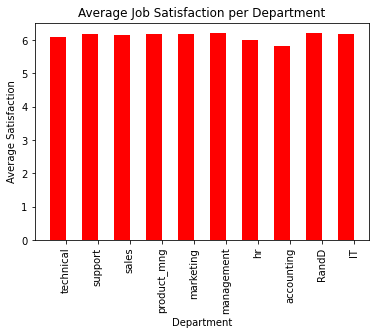

In [77]:
#import the matplotlib pyplot module and specify display plots inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, satisfaction, bar_width,
                 color='r')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction')
plt.title('Average Job Satisfaction per Department')
plt.xticks(index + bar_width/2, department, rotation=90)
plt.show()

<a id="DataFrame"></a>
## Working with DataFrame
A DataFrame is a two-dimensional data structure organized into rows and named columns.
We will explore the data loaded in df_data_1 DataFrame.  We start from inspecting the data.

### Inspecting Data

In [78]:
# Number of rows in a DataFrame
print('Number of employees:', df_data_1.count())

Number of employees: 29998


In [79]:
# The columns list
df_data_1.columns

['ID',
 'satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'Department',
 'salary',
 'Attrition']

In [80]:
# Number of columns
len(df_data_1.columns)

11

In [81]:
# Returns the columns and their data types
df_data_1.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- satisfaction_level: double (nullable = true)
 |-- last_evaluation_rating: double (nullable = true)
 |-- projects_worked_on: integer (nullable = true)
 |-- average_monthly_hours: integer (nullable = true)
 |-- time_spend_company: integer (nullable = true)
 |-- Work_accident: integer (nullable = true)
 |-- promotion_last_5years: integer (nullable = true)
 |-- Department: string (nullable = true)
 |-- salary: string (nullable = true)
 |-- Attrition: integer (nullable = true)



In [82]:
# Print the (logical and physical) plans
df_data_1.explain()

== Physical Plan ==
Scan In-memory table ea [ID#87, satisfaction_level#88, last_evaluation_rating#89, projects_worked_on#90, average_monthly_hours#91, time_spend_company#92, Work_accident#93, promotion_last_5years#94, Department#95, salary#96, Attrition#97]
   +- InMemoryRelation [ID#87, satisfaction_level#88, last_evaluation_rating#89, projects_worked_on#90, average_monthly_hours#91, time_spend_company#92, Work_accident#93, promotion_last_5years#94, Department#95, salary#96, Attrition#97], StorageLevel(disk, memory, deserialized, 1 replicas)
         +- FileScan csv [ID#87,satisfaction_level#88,last_evaluation_rating#89,projects_worked_on#90,average_monthly_hours#91,time_spend_company#92,Work_accident#93,promotion_last_5years#94,Department#95,salary#96,Attrition#97] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex[cos://apachesparktutorial-donotdelete-pr-uphu827q6nmaro.os_bbb4ec1232254925be0f..., PartitionFilters: [], PushedFilters: [], ReadSchema: struct<ID:i

In [83]:
#returns first observation
df_data_1.head()

Row(ID=1, satisfaction_level=3.8, last_evaluation_rating=5.3, projects_worked_on=3, average_monthly_hours=167, time_spend_company=3, Work_accident=0, promotion_last_5years=0, Department='sales', salary='low', Attrition=1)

In [84]:
#Returns the first 2 observations
df_data_1.head(2)

[Row(ID=1, satisfaction_level=3.8, last_evaluation_rating=5.3, projects_worked_on=3, average_monthly_hours=167, time_spend_company=3, Work_accident=0, promotion_last_5years=0, Department='sales', salary='low', Attrition=1),
 Row(ID=2, satisfaction_level=8.0, last_evaluation_rating=8.6, projects_worked_on=6, average_monthly_hours=272, time_spend_company=6, Work_accident=0, promotion_last_5years=0, Department='sales', salary='medium', Attrition=1)]

In [85]:
#Returns the first 2 rows.  The data is displayed under the column names
df_data_1.show(2)

+---+------------------+----------------------+------------------+---------------------+------------------+-------------+---------------------+----------+------+---------+
| ID|satisfaction_level|last_evaluation_rating|projects_worked_on|average_monthly_hours|time_spend_company|Work_accident|promotion_last_5years|Department|salary|Attrition|
+---+------------------+----------------------+------------------+---------------------+------------------+-------------+---------------------+----------+------+---------+
|  1|               3.8|                   5.3|                 3|                  167|                 3|            0|                    0|     sales|   low|        1|
|  2|               8.0|                   8.6|                 6|                  272|                 6|            0|                    0|     sales|medium|        1|
+---+------------------+----------------------+------------------+---------------------+------------------+-------------+-------------------

In [86]:
#summary statistics for 1 variable
df_data_1.describe( 'satisfaction_level').show()

+-------+------------------+
|summary|satisfaction_level|
+-------+------------------+
|  count|             29998|
|   mean| 6.128335222348161|
| stddev|2.4862650676799105|
|    min|               0.9|
|    max|              10.0|
+-------+------------------+



In [87]:
#summary statistics for 2 variables
df_data_1.describe( 'satisfaction_level', 'time_spend_company').show()

+-------+------------------+------------------+
|summary|satisfaction_level|time_spend_company|
+-------+------------------+------------------+
|  count|             29998|             29998|
|   mean| 6.128335222348161| 3.498233215547703|
| stddev|2.4862650676799105| 1.460111892294992|
|    min|               0.9|                 2|
|    max|              10.0|                10|
+-------+------------------+------------------+



In [88]:
#Describe for non-numeric column -  Minimum and maximum is based on ASCI value
df_data_1.describe( 'Department').show()

+-------+----------+
|summary|Department|
+-------+----------+
|  count|     29998|
|   mean|      null|
| stddev|      null|
|    min|        IT|
|    max| technical|
+-------+----------+



## <span style="color:red">Graded Exercise 1</span>
Write and run the code to show the summary statistics for average_monthly_hours

In [89]:
df_data_1.describe( 'average_monthly_hours').show()

+-------+---------------------+
|summary|average_monthly_hours|
+-------+---------------------+
|  count|                29998|
|   mean|    206.0503366891126|
| stddev|    50.19194015117288|
|    min|                   96|
|    max|                  320|
+-------+---------------------+



### Selecting Data

In [90]:
#Show the specified columns
df_data_1.select('Department', 'satisfaction_level', 'salary', 'Attrition').show(10)

+----------+------------------+------+---------+
|Department|satisfaction_level|salary|Attrition|
+----------+------------------+------+---------+
|     sales|               3.8|   low|        1|
|     sales|               8.0|medium|        1|
|     sales|               1.1|medium|        1|
|     sales|               3.7|   low|        1|
|     sales|               4.1|   low|        1|
|     sales|               1.0|   low|        1|
|     sales|               9.2|   low|        1|
|     sales|               8.9|   low|        1|
|     sales|               4.2|   low|        1|
|     sales|               1.1|   low|        1|
+----------+------------------+------+---------+
only showing top 10 rows



### <span style="color:red">Graded Exercise 2</span>
Write and run the code to select ID, department, salary, Attrition and show the first 5 rows.

In [91]:
df_data_1.select('ID','Department', 'salary', 'Attrition').show(5)

+---+----------+------+---------+
| ID|Department|salary|Attrition|
+---+----------+------+---------+
|  1|     sales|   low|        1|
|  2|     sales|medium|        1|
|  3|     sales|medium|        1|
|  4|     sales|   low|        1|
|  5|     sales|   low|        1|
+---+----------+------+---------+
only showing top 5 rows



In [92]:
# Rename the column in the output.  For instance, abbreviate satisfaction_level as sl 
df_data_1.select('Department', 'satisfaction_level', 'salary', 'Attrition').withColumnRenamed('satisfaction_level', 'sl').show(10)

+----------+---+------+---------+
|Department| sl|salary|Attrition|
+----------+---+------+---------+
|     sales|3.8|   low|        1|
|     sales|8.0|medium|        1|
|     sales|1.1|medium|        1|
|     sales|3.7|   low|        1|
|     sales|4.1|   low|        1|
|     sales|1.0|   low|        1|
|     sales|9.2|   low|        1|
|     sales|8.9|   low|        1|
|     sales|4.2|   low|        1|
|     sales|1.1|   low|        1|
+----------+---+------+---------+
only showing top 10 rows



In [93]:
# List the distinct values.  For instance, list the department names
df_data_1.select('Department').distinct().show()

+-----------+
| Department|
+-----------+
| management|
|product_mng|
|  marketing|
|      sales|
|         hr|
| accounting|
|    support|
|         IT|
|  technical|
|      RandD|
+-----------+



### <span style="color:red">Graded Exercise 3</span>
Write and run the code to display the distinct salary values.

In [94]:
df_data_1.select('salary').distinct().show()

+------+
|salary|
+------+
|   low|
|  high|
|medium|
+------+



In [95]:
#Return the number of distinct values in a column.  For instance, return the number of departments
df_data_1.select('Department').distinct().count()

10

In [96]:
# First 20 employees with the job satisfaction above 9.8
df_data_1.select('Department', 'satisfaction_level', 'salary', 'Attrition').filter(df_data_1['satisfaction_level']>9.8).show()

+-----------+------------------+------+---------+
| Department|satisfaction_level|salary|Attrition|
+-----------+------------------+------+---------+
|      sales|               9.9|   low|        0|
|  technical|              10.0|   low|        0|
|  technical|              10.0|   low|        0|
|    support|              10.0|   low|        0|
|      sales|              10.0|   low|        0|
|  technical|               9.9|medium|        0|
|  technical|              10.0|   low|        0|
|  technical|               9.9|   low|        0|
|    support|               9.9|medium|        0|
|  technical|               9.9|medium|        0|
|  marketing|              10.0|  high|        0|
|         hr|               9.9|   low|        0|
|         hr|              10.0|   low|        0|
| management|               9.9|medium|        0|
|  marketing|               9.9|   low|        0|
|      sales|               9.9|medium|        0|
|product_mng|               9.9|   low|        0|


### <span style="color:red">Graded Exercise 4</span>
Modify and run the code from Graded exercise 2 to return the ID, department, salary, Attrition for the first 5 employees in hr department.

In [97]:
df_data_1.select('ID','Department', 'salary', 'Attrition').filter(df_data_1['Department']=='hr').show(5)

+---+----------+------+---------+
| ID|Department|salary|Attrition|
+---+----------+------+---------+
| 21|        hr|   low|        1|
| 22|        hr|   low|        1|
| 23|        hr|   low|        1|
| 73|        hr|medium|        1|
| 74|        hr|  high|        1|
+---+----------+------+---------+
only showing top 5 rows



In [98]:
# Department name ends with 'ing'
df_data_1.select('Department', 'satisfaction_level', 'salary', 'Attrition').filter(df_data_1.Department.endswith("ing")).show()

+----------+------------------+------+---------+
|Department|satisfaction_level|salary|Attrition|
+----------+------------------+------+---------+
|accounting|               4.1|   low|        1|
|accounting|               0.9|   low|        1|
| marketing|               4.0|medium|        1|
| marketing|               1.1|   low|        1|
|accounting|               9.1|medium|        1|
|accounting|               4.4|medium|        1|
| marketing|               8.4|   low|        1|
| marketing|               1.1|   low|        1|
| marketing|               4.5|   low|        1|
| marketing|               3.7|   low|        1|
| marketing|               4.0|   low|        1|
|accounting|               1.1|   low|        1|
| marketing|               4.5|   low|        1|
| marketing|               1.0|   low|        1|
| marketing|               9.0|   low|        1|
|accounting|               8.9|medium|        1|
|accounting|               1.1|medium|        1|
|accounting|        

In [99]:
#Satisfaction between 0.1 and 1
df_data_1.select('department', 'satisfaction_level', 'salary', 'Attrition').filter(df_data_1.satisfaction_level.between(0.1, 1)).show()

+-----------+------------------+------+---------+
| department|satisfaction_level|salary|Attrition|
+-----------+------------------+------+---------+
|      sales|               1.0|   low|        1|
| accounting|               0.9|   low|        1|
|  technical|               1.0|   low|        1|
|  technical|               0.9|   low|        1|
|  technical|               1.0|   low|        1|
|         IT|               1.0|medium|        1|
|product_mng|               0.9|   low|        1|
|product_mng|               1.0|medium|        1|
|      sales|               0.9|   low|        1|
|      sales|               0.9|medium|        1|
|         hr|               0.9|  high|        1|
|    support|               0.9|   low|        1|
|    support|               1.0|   low|        1|
|  technical|               1.0|   low|        1|
|         IT|               0.9|   low|        1|
|  marketing|               1.0|   low|        1|
|      sales|               1.0|   low|        1|


### Pairwise Frequency

In [100]:
#Pairwise Frequency for categorical variables
df_data_1.crosstab('Department', 'salary').show()

+-----------------+----+----+------+
|Department_salary|high| low|medium|
+-----------------+----+----+------+
|          support| 282|2292|  1884|
|       accounting| 148| 716|   670|
|               hr|  90| 670|   718|
|        marketing| 160| 804|   752|
|            sales| 538|4198|  3544|
|      product_mng| 136| 902|   766|
|       management| 450| 360|   450|
|            RandD| 102| 728|   744|
|               IT| 166|1218|  1070|
|        technical| 402|2744|  2294|
+-----------------+----+----+------+



In [101]:
df_data_1.crosstab('attrition', 'salary').show()

+----------------+----+-----+------+
|attrition_salary|high|  low|medium|
+----------------+----+-----+------+
|               1| 164| 4344|  2634|
|               0|2310|10288| 10258|
+----------------+----+-----+------+



In [102]:
df_data_1.crosstab('attrition', 'promotion_last_5years').show()

+-------------------------------+-----+---+
|attrition_promotion_last_5years|    0|  1|
+-------------------------------+-----+---+
|                              1| 7104| 38|
|                              0|22256|600|
+-------------------------------+-----+---+



### GroupBy

In [103]:
#Number of employees in each department
df_data_1.groupby('Department').count().show()

+-----------+-----+
| Department|count|
+-----------+-----+
| management| 1260|
|product_mng| 1804|
|  marketing| 1716|
|      sales| 8280|
|         hr| 1478|
| accounting| 1534|
|    support| 4458|
|         IT| 2454|
|  technical| 5440|
|      RandD| 1574|
+-----------+-----+



In [104]:
#sort the output by count descending
df_data_1.groupby('Department').count().sort('count', ascending=False).show()

+-----------+-----+
| Department|count|
+-----------+-----+
|      sales| 8280|
|  technical| 5440|
|    support| 4458|
|         IT| 2454|
|product_mng| 1804|
|  marketing| 1716|
|      RandD| 1574|
| accounting| 1534|
|         hr| 1478|
| management| 1260|
+-----------+-----+



In [105]:
# Average job satisfaction in each department
df_data_1.groupby(['Department'])\
.agg({"satisfaction_level": "AVG"}).show()
# Average job satisfaction in each department per salary level
df_data_1.groupby(['Department', 'salary'])\
.agg({"satisfaction_level": "AVG"}).show()

+-----------+-----------------------+
| Department|avg(satisfaction_level)|
+-----------+-----------------------+
| management|      6.213492063492047|
|product_mng|       6.19634146341463|
|  marketing|      6.186013986013976|
|      sales|      6.144468599033787|
|         hr|      5.988092016238163|
| accounting|      5.821512385919163|
|    support|      6.182996859578301|
|         IT|      6.181418092909555|
|  technical|      6.078970588235297|
|      RandD|      6.198221092757298|
+-----------+-----------------------+

+-----------+------+-----------------------+
| Department|salary|avg(satisfaction_level)|
+-----------+------+-----------------------+
|product_mng|medium|      6.191122715404705|
|    support|medium|      6.451486199575372|
|      RandD|medium|      6.203494623655912|
| accounting|   low|      5.741620111731849|
| management|  high|      6.533333333333346|
|         IT|medium|      6.241869158878499|
| accounting|  high|      6.140540540540541|
|         IT|   l

### <span style="color:red">Graded Exercise 5</span>
Write and run the code to return the average job satisfaction for each salary level.  Display the salary level and corresponding average satisfaction.

In [106]:
df_data_1.groupby(['salary'])\
.agg({"satisfaction_level": "AVG"}).show()

+------+-----------------------+
|salary|avg(satisfaction_level)|
+------+-----------------------+
|   low|       6.00753143794426|
|  high|      6.374696847210975|
|medium|      6.218166304685114|
+------+-----------------------+



### Plot Average Job Satisfaction per department

In [107]:
dasl=df_data_1.groupby(['Department'])\
.agg({"satisfaction_level": "AVG"}).collect()

depart=[]
satisfaction=[]
for row in dasl:
     depart.append(row["Department"])
     satisfaction.append(row["avg(satisfaction_level)"])

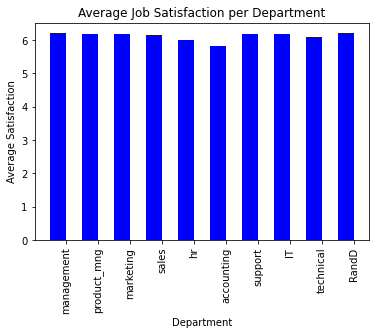

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 10
index = np.arange(N)  
bar_width = 0.5

plt.bar(index, satisfaction, bar_width,
                 color='b')
plt.xlabel('Department')
plt.ylabel('Average Satisfaction')
plt.title('Average Job Satisfaction per Department')
plt.xticks(index + bar_width/2, depart, rotation=90)
plt.show()


<a id="use_spark_sql"></a>
## Use Spark SQL

`Spark SQL` lets you query structured data, for example, data in a relational table and can be a very powerful tool for performing complex aggregations.

To create a relational table that you can query using `Spark SQL` and fill it with employee data, you'll use the `Row` class from the `pyspark.sql` package. You will use every line in the `df_data_1` DataFrame to create a row object. Each of the row's attributes will be used to access the value of each column.

In [109]:
from pyspark.sql import SQLContext, Row
sqlContext = SQLContext(sc)
df_data_1.registerTempTable("ea")
sqlContext.cacheTable("ea")

In [110]:
# Column 1 - Department
# Column 2 - Number of employees who worked for the department in column 1 and left
empl1 = sqlContext.sql("SELECT department, COUNT(*) AS numemp FROM ea WHERE Attrition=1 GROUP BY department ORDER BY upper(department)").collect()
for row in empl1:
    print (row)

Row(department='accounting', numemp=408)
Row(department='hr', numemp=430)
Row(department='IT', numemp=546)
Row(department='management', numemp=182)
Row(department='marketing', numemp=406)
Row(department='product_mng', numemp=396)
Row(department='RandD', numemp=242)
Row(department='sales', numemp=2028)
Row(department='support', numemp=1110)
Row(department='technical', numemp=1394)


In [111]:
# Column 1 - Department
# Column 2 - Number of retained employees from the department in column 1
empl0 = sqlContext.sql("SELECT department, COUNT(*) AS numemp FROM ea WHERE Attrition=0 GROUP BY department ORDER BY upper(department)").collect()

In [112]:
for row in empl0:
    print (row)

Row(department='accounting', numemp=1126)
Row(department='hr', numemp=1048)
Row(department='IT', numemp=1908)
Row(department='management', numemp=1078)
Row(department='marketing', numemp=1310)
Row(department='product_mng', numemp=1408)
Row(department='RandD', numemp=1332)
Row(department='sales', numemp=6252)
Row(department='support', numemp=3348)
Row(department='technical', numemp=4046)


In [113]:
department=[]
Attrition0=[]
Attrition1=[]
for row in empl0:
     department.append(row.department)
     Attrition0.append(row.numemp)

for row in empl1:
    Attrition1.append(row.numemp)

Use the bar() function to plot a vertical bar chart.

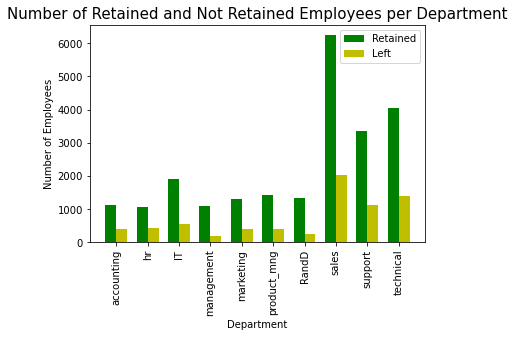

In [114]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N=10
ind=np.arange(N)
width = 0.35
ea0 = plt.bar(ind, Attrition0, width, color='g', label='Retained')
ea1 = plt.bar(ind+width, Attrition1, width, color='y', label='Left')
plt.ylabel('Number of Employees')
plt.xlabel('Department')
plt.title('Number of Retained and Not Retained Employees per Department', fontsize=15)
plt.xticks(ind+width/2, department, rotation='vertical')
plt.legend()
plt.show()

You can create a pie chart with the pie() function. The function does not display legends or label names by default. You can use the input parameters to change the default colors, set legends, labels, the starting angle, shadowing, and whether any section is exploded.

The default starting angle is 0, which starts the first slice on the x-axis. If you set startangle=90, the first slice starts on the positive y-axis.

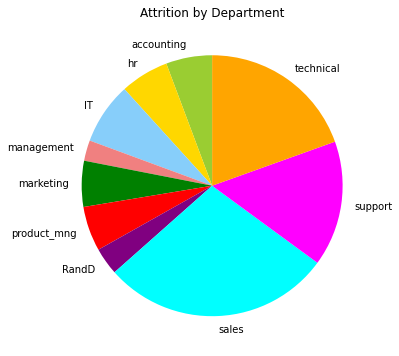

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data = Attrition1  
labels = department
plt.figure(1, figsize=(6,6))  # make it square
colors = ['yellowgreen', 'gold', 'lightskyblue', 
          'lightcoral', 'green', 'red', 'purple', 'cyan', 'magenta', 'orange']
plt.pie(data, labels=labels, colors= colors, startangle=90)
plt.title('Attrition by Department')
plt.show()

### <span style="color:red">Graded Exercise 6</span>
Use Spark SQL to return <br>
Column 1 - salary level <br>
Column 2 - number of employees with a salary level in column 1

In [143]:
# Column 1 - salary level
# Column 2 - number of employees with a salary level in column 1
empl2 = sqlContext.sql("SELECT salary, COUNT(*) AS numemp FROM ea GROUP BY salary").collect()
for row in empl2:
    print (row)


Row(salary='low', numemp=14632)
Row(salary='high', numemp=2474)
Row(salary='medium', numemp=12892)


**Navigate to Manage -> Environmental Runtimes and record 1) Total account capacity unit hours used and 2) Remaining account capacity unit hours on the Spark Tutorial answer sheet. 3) Answer the follow up questions on the assignment answer sheet**

### <span style="color:Blue">Ungraded Exercise 1</span>
Use Spark SQL to return <br> 
Column 1 - department name <br>
Column 2 - salary level  <br>
Column 3 - number of retained employees who work for the department in column 1 and have a salary level in column 2 <br>
Sort the retuned data by department name

In [144]:
#Column 1 - department name
#Column 2 - salary level
#Column 3 - number of retained employees who work for the department in column 1 and have a salary level in column 2
#Sort the retuned data by department name
empl3 = sqlContext.sql("SELECT department,SELECT salary, COUNT(*) AS numemp FROM ea WHERE Attrition=0 GROUP BY department ORDER BY upper(department)").collect()

for row in empl3:
    print (row)


Row(salary='low', numemp=10288)
Row(salary='high', numemp=2310)
Row(salary='medium', numemp=10258)
Row(department='accounting', numemp=1126)
Row(department='hr', numemp=1048)
Row(department='IT', numemp=1908)
Row(department='management', numemp=1078)
Row(department='marketing', numemp=1310)
Row(department='product_mng', numemp=1408)
Row(department='RandD', numemp=1332)
Row(department='sales', numemp=6252)
Row(department='support', numemp=3348)
Row(department='technical', numemp=4046)


### <span style="color:Blue">Ungraded Exercise 2</span>
Use Spark SQL to return <br> 
Column 1 - department name <br>
Column 2 - salary level  <br>
Column 3 - attrition<br>
Column 4 - number of employees who work/worked for the department in column 1 with a salary level in column 2 and attrition status in column 3 <br>
Sort the retuned data by department name

In [146]:
# Column 1 - department name
# Column 2 - salary level
# Column 3 - attrition
# Column 4 - number of employees who work/worked for the department in column 1 with a salary level in column 2 and attrition status in column 3
# Sort the retuned data by department name
empl4 = sqlContext.sql("SELECT department, salary,  Attrition, COUNT(*) AS numemp FROM ea WHERE Attrition=0 GROUP BY department ORDER BY upper(department)").collect()

for row in empl4:
    print (row)

Row(salary='low', numemp=14632)
Row(salary='high', numemp=2474)
Row(salary='medium', numemp=12892)


### <span style="color:Blue">Ungraded Exercise 3</span>
Use Spark SQL to return <br> 
Column 1 - department name <br>
Column 2 - number of retained employees from department in column 1 <br>
Column 3 - number of employees who left from department in column 1 <br>
Column 4 - total number of employees from department in column 1 <br>
Sort the retuned data by department name

In [ ]:
empl5 = sqlContext.sql("SELECT department,  COUNT(*) AS numemp FROM ea WHERE Attrition=0, COUNT(*) AS numemp FROM ea WHERE Attrition=1, COUNT(*)  GROUP BY department ORDER BY upper(department),  salary, COUNT(*) AS numemp FROM ea WHERE Attrition=0 GROUP BY department ORDER BY upper(department)").collect()

for row in empl5:
    print (row)